<div class="alert alert-success">
<h1> Beer Data Science Assignment </h1>
</div>


In [110]:
from IPython.display import HTML
import pandas as pd
import os
import numpy as np
from datetime import datetime
import wordcloud
import warnings
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

BASE_PATH = "../"
INPUT_DATA_PATH = os.path.join(BASE_PATH, "data/raw/BeerDataScienceProject.csv")

In [2]:
df_beer_raw = pd.read_csv(INPUT_DATA_PATH, encoding="ISO-8859-1")

In [3]:
df_beer_raw.shape

(528870, 13)

In [4]:
df_beer_raw.dtypes

beer_ABV              float64
beer_beerId             int64
beer_brewerId           int64
beer_name              object
beer_style             object
review_appearance     float64
review_palette        float64
review_overall        float64
review_taste          float64
review_profileName     object
review_aroma          float64
review_text            object
review_time             int64
dtype: object

### Data Cleaning
```In the below cell we can see that there are some columns where data is missing. 
   We need to remove those data points from our data set.
```

In [5]:
df_beer_raw.isna().sum()

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
dtype: int64

In [6]:
df_beer = df_beer_raw.dropna()

In [7]:
df_beer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508358 entries, 0 to 528796
Data columns (total 13 columns):
beer_ABV              508358 non-null float64
beer_beerId           508358 non-null int64
beer_brewerId         508358 non-null int64
beer_name             508358 non-null object
beer_style            508358 non-null object
review_appearance     508358 non-null float64
review_palette        508358 non-null float64
review_overall        508358 non-null float64
review_taste          508358 non-null float64
review_profileName    508358 non-null object
review_aroma          508358 non-null float64
review_text           508358 non-null object
review_time           508358 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 54.3+ MB


## Data Changes in Raw and Clean dataset

In [8]:
print("Raw data size: ", df_beer_raw.shape[0])
print("Clean data size: ", df_beer.shape[0])
print("Data points difference: ", df_beer_raw.shape[0]-df_beer.shape[0])

Raw data size:  528870
Clean data size:  508358
Data points difference:  20512


### Describe the categorical features

In [9]:
df_beer.describe(include=[np.object])

,beer_name,beer_style,review_profileName,review_text
count,508358,508358,508358,508358
unique,14028,104,22563,508007
top,Sierra Nevada Celebration Ale,American IPA,northyorksammy,#NAME?
freq,2998,42092,1732,90


### Describe the numerical features

In [10]:
df_beer.describe(include=[np.number])

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
count,508358.000000,508358.000000,508358.000000,508358.000000,508358.000000,508358.000000,508358.000000,508358.000000,5.083580e+05
mean,7.017400,21824.120840,2534.273207,3.872676,3.768993,3.840805,3.775327,3.827646,1.226175e+09
std,2.204528,22124.969107,5237.843825,0.601764,0.682355,0.706408,0.665586,0.715121,7.530843e+07
min,0.010000,5.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.843904e+08
25%,5.300000,1673.000000,132.000000,3.500000,3.500000,3.500000,3.500000,3.500000,1.177202e+09
50%,6.500000,13850.000000,392.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.241503e+09
75%,8.500000,40418.000000,1315.000000,4.000000,4.000000,4.500000,4.000000,4.500000,1.289073e+09
max,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.326277e+09


In [11]:
NUMERICAL_ATTRIBUTE = ['beer_ABV', 'review_appearance', 'review_palette', 
                       'review_overall', 'review_taste', 'review_aroma', 'review_time']
CATEGORICAL_ATTRIBUTE = ['beer_name', 'beer_style', 'review_profileName', 'review_text']

In [12]:
df_beer.sample(4)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
444951,5.5,51761,590,Unplugged Old English Porter,English Porter,4.0,3.5,3.0,3.5,emmasdad,3.0,Part of a New Glarus mix pack Dan brought me b...,1290137977
461820,6.5,1472,559,Big Daddy IPA,American IPA,4.0,3.0,4.5,4.0,jcdiflorio,3.0,Poured into a nonic glass from a 12oz brown lo...,1178323230
400156,9.3,48224,694,Flying Mouflan,American Barleywine,4.0,4.5,4.5,4.5,denniskuehn,4.5,Poured from the 22oz bottle into a wine glass....,1239496271
463812,8.0,1128,392,Old Heathen Imperial Stout,Russian Imperial Stout,4.0,4.0,3.5,3.5,shivtim,3.5,"Love the name. Pours out an opaque black, with...",1203878205


<div class="alert alert-info">
Convert the review timestamp to datetime format
</div>

In [13]:
df_beer['d_review_time'] = df_beer.review_time.apply(lambda t: datetime.fromtimestamp(t))

In [14]:
df_beer['d_review_time_year'] = df_beer['d_review_time'].dt.year
df_beer['d_review_time_month'] = df_beer['d_review_time'].dt.month

<div class="alert alert-success">
Q1) Rank top 3 Breweries which produce the strongest beers?
</div>


```TOP 3 Breweries which produce strongest beers:  [6513, 35, 16866]
```

In [81]:
top_n_strongest_beer = df_beer.sort_values(by=["beer_ABV"], ascending=False).groupby(['beer_brewerId'])['beer_brewerId', 'beer_ABV', 'beer_name'].head(1).reset_index()

In [86]:
top_n_strongest_beer.head(3)

,index,beer_brewerId,beer_ABV,beer_name
0,12889,6513,57.7,Schorschbräu Schorschbock 57%
1,293762,35,27.0,Samuel Adams Utopias
2,58570,16866,19.5,Grey Monday


In [92]:
print("TOP 3 Breweries which produce strongest beers: ", top_n_strongest_beer.beer_brewerId.tolist()[:3])

TOP 3 Breweries which produce strongest beers:  [6513, 35, 16866]


<div class="alert alert-success">
Q2) Which year did beers enjoy the highest ratings? 
</div>


```Beer enjoy the highest rating in the year: ``` **2010**

In [104]:
beer_enjoy_highest_rating = df_beer.groupby(['d_review_time_year', 'review_overall']).size().reset_index(name='counts')

In [108]:
beer_enjoy_highest_rating.sort_values(by=["review_overall", 'counts'], ascending=False).head(10)

,d_review_time_year,review_overall,counts
101,2010,5.0,5974
92,2009,5.0,5149
110,2011,5.0,4496
83,2008,5.0,4127
74,2007,5.0,2826
65,2006,5.0,2564
56,2005,5.0,1937
47,2004,5.0,1411
38,2003,5.0,982
29,2002,5.0,526


<div class="alert alert-success">
Q3) Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?
</div>

In [133]:
correlation_df_beer = df_beer[['review_appearance', 'review_palette', 'review_overall',
       'review_taste', 'review_aroma']].corr(method='pearson')

In [134]:
correlation_df_beer

,review_appearance,review_palette,review_overall,review_taste,review_aroma
review_appearance,1.000000,0.544724,0.483091,0.551979,0.531204
review_palette,0.544724,1.000000,0.598048,0.600842,0.703428
review_overall,0.483091,0.598048,1.000000,0.689276,0.780310
review_taste,0.551979,0.600842,0.689276,1.000000,0.722737
review_aroma,0.531204,0.703428,0.780310,0.722737,1.000000


[Text(0, 0.5, 'review_appearance'),
 Text(0, 1.5, 'review_palette'),
 Text(0, 2.5, 'review_overall'),
 Text(0, 3.5, 'review_taste'),
 Text(0, 4.5, 'review_aroma')]

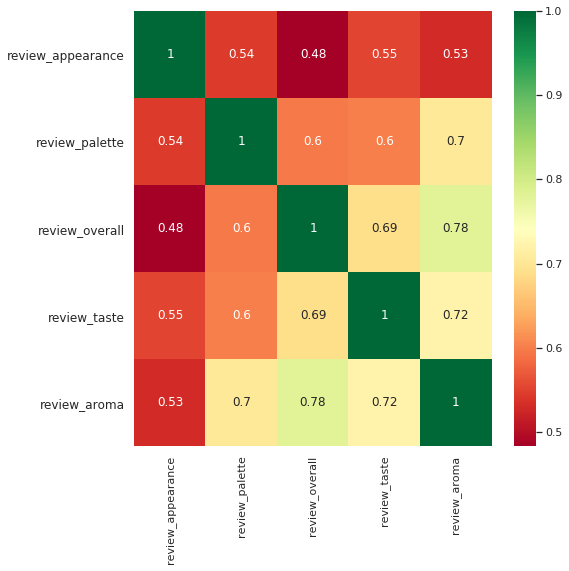

In [135]:
plt.figure(figsize=(8,8))
g = sns.heatmap(correlation_df_beer, annot=True,cmap="RdYlGn")
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 12)

<div class="alert alert-info">
     From the above heat map. If you can see the review_overall row. We can easily see the following feature importance ranking:<br/>
        aroma > taste > palette > apperance 
</div>